In [29]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
obesity_df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

In [31]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [32]:
obesity_df.shape

(2111, 17)

In [33]:
obesity_df['BMI'] = obesity_df['Weight']/(obesity_df['Height'] ** 2)

In [34]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [35]:
obesity_df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

In [39]:
c = obesity_df.NObeyesdad.astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [41]:
#Convert categorical columns into numeric columns
obesity_df['Gender'] = obesity_df['Gender'].astype('category').cat.codes
obesity_df['family_history_with_overweight'] = obesity_df['family_history_with_overweight'].astype('category').cat.codes
obesity_df['FAVC'] = obesity_df['FAVC'].astype('category').cat.codes
obesity_df['CAEC'] = obesity_df['CAEC'].astype('category').cat.codes
obesity_df['SMOKE'] = obesity_df['SMOKE'].astype('category').cat.codes
obesity_df['SCC'] = obesity_df['SCC'].astype('category').cat.codes
obesity_df['CALC'] = obesity_df['CALC'].astype('category').cat.codes
obesity_df['MTRANS'] = obesity_df['MTRANS'].astype('category').cat.codes
obesity_df['NObeyesdad'] = obesity_df['NObeyesdad'].astype('category').cat.codes


In [42]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,28.342381


In [43]:
obesity_df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.015632,29.700159
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.952090,8.011337
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.998685
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000,24.325802
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000,28.719089
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000,36.016501
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000,50.811753


In [44]:
print("Min:\n",obesity_df.min())
print("Mean:\n",obesity_df.mean())
print("Median:\n",obesity_df.median())
print("Mode:\n",obesity_df.mode())
print("Max:\n",obesity_df.max())


Min:
 Gender                             0.000000
Age                               14.000000
Height                             1.450000
Weight                            39.000000
family_history_with_overweight     0.000000
FAVC                               0.000000
FCVC                               1.000000
NCP                                1.000000
CAEC                               0.000000
SMOKE                              0.000000
CH2O                               1.000000
SCC                                0.000000
FAF                                0.000000
TUE                                0.000000
CALC                               0.000000
MTRANS                             0.000000
NObeyesdad                         0.000000
BMI                               12.998685
dtype: float64
Mean:
 Gender                             0.505921
Age                               24.312600
Height                             1.701677
Weight                            86.586058
fami

In [45]:
print("Q1:\n",obesity_df.quantile(q = 0.25))
print("Q2:\n",obesity_df.quantile(q = 0.5))
print("Q3:\n",obesity_df.quantile(q = 0.75))
print("Q4:\n",obesity_df.quantile(q = 1))

Q1:
 Gender                             0.000000
Age                               19.947192
Height                             1.630000
Weight                            65.473343
family_history_with_overweight     1.000000
FAVC                               1.000000
FCVC                               2.000000
NCP                                2.658738
CAEC                               2.000000
SMOKE                              0.000000
CH2O                               1.584812
SCC                                0.000000
FAF                                0.124505
TUE                                0.000000
CALC                               2.000000
MTRANS                             3.000000
NObeyesdad                         1.000000
BMI                               24.325802
Name: 0.25, dtype: float64
Q2:
 Gender                             1.000000
Age                               22.777890
Height                             1.700499
Weight                            83.00

<AxesSubplot:>

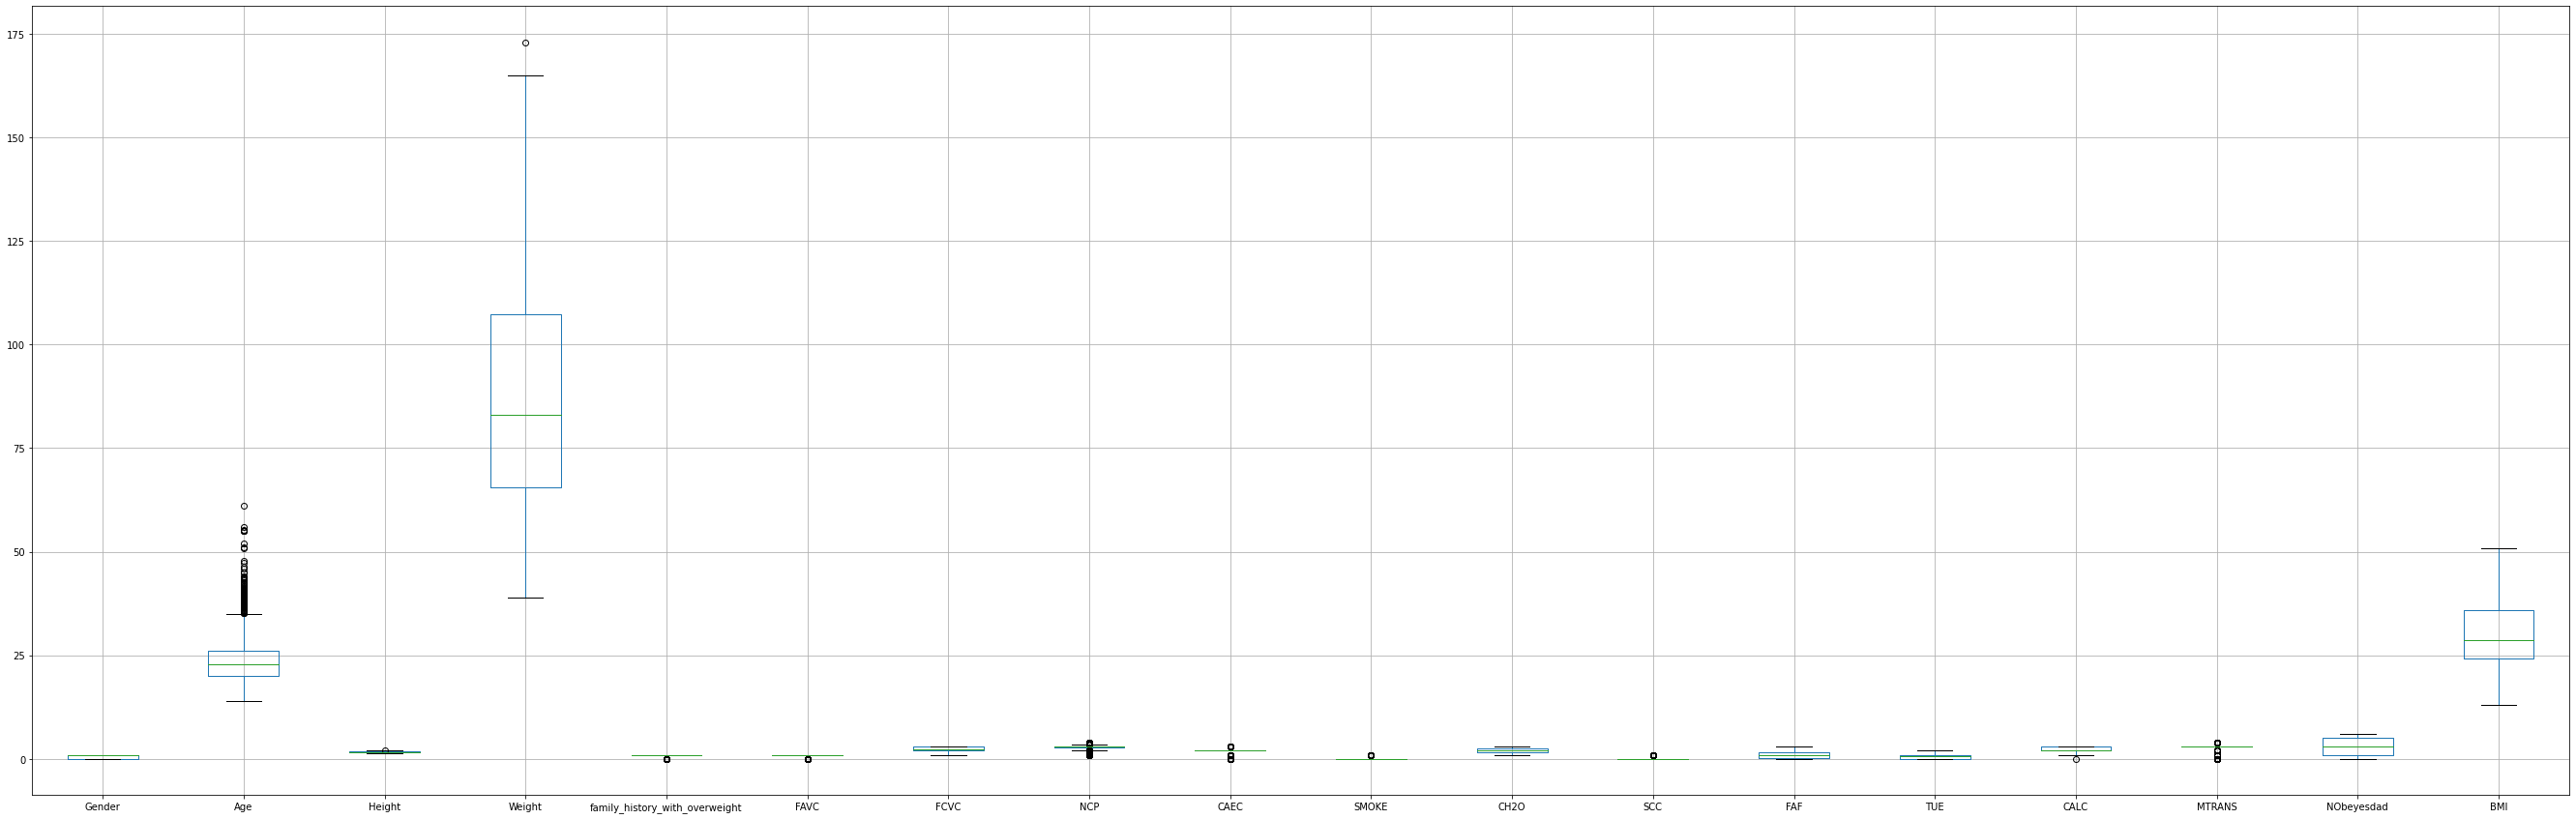

In [13]:
obesity_df.boxplot(figsize=(47,15))

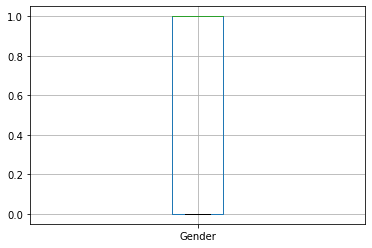

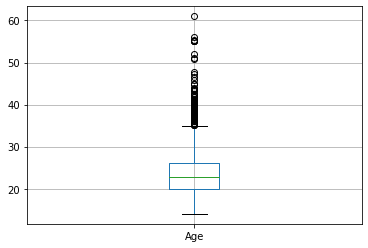

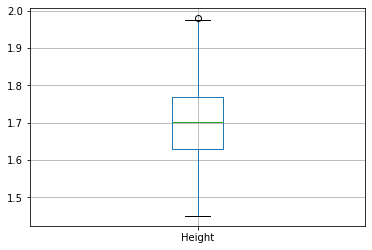

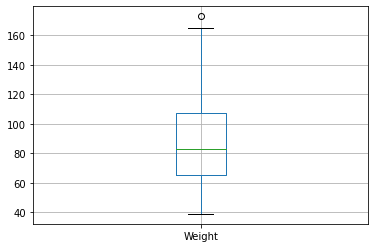

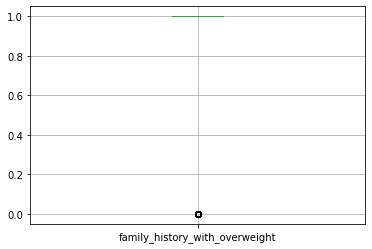

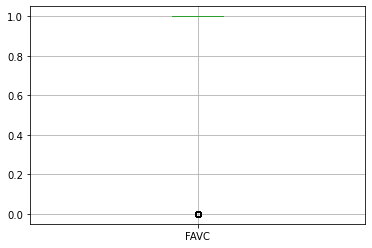

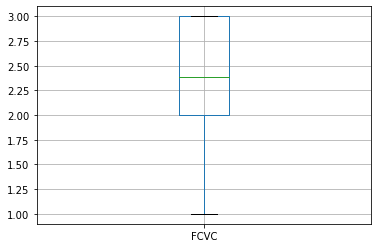

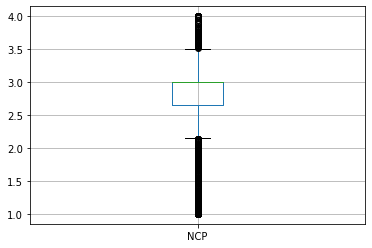

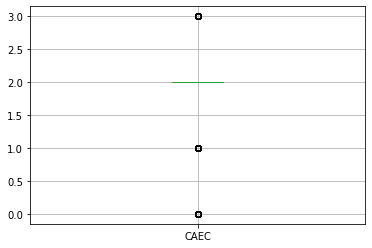

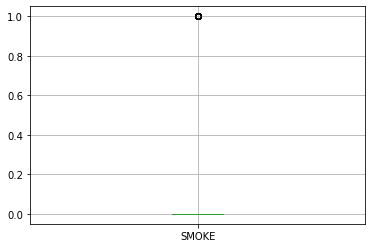

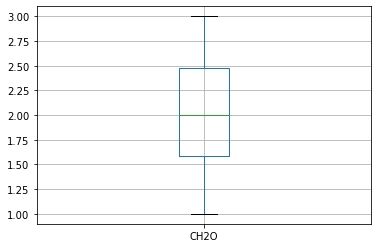

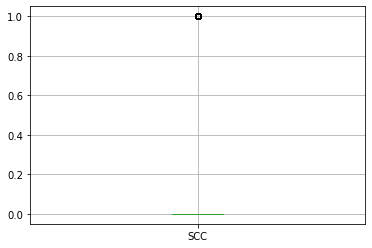

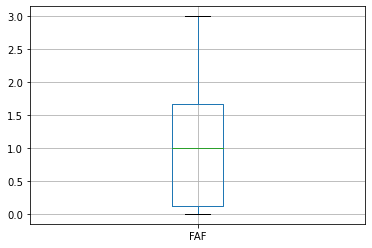

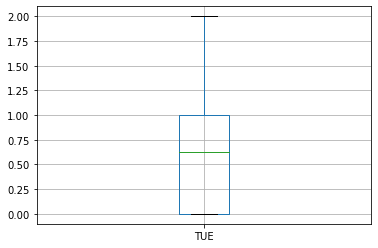

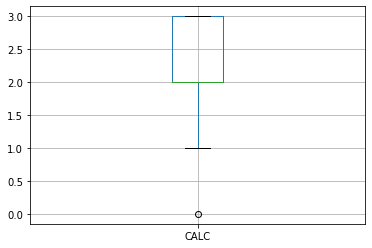

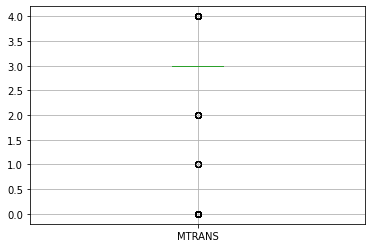

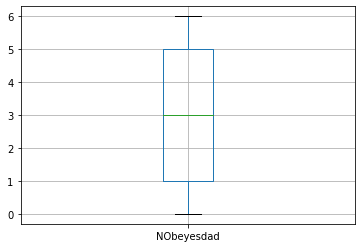

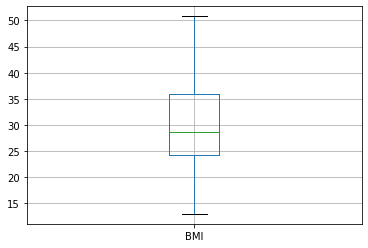

In [14]:
import matplotlib.pyplot as plt

for column in obesity_df:
    plt.figure()
    obesity_df.boxplot([column],figsize=(20,15))

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'family_history_with_overweight'}>,
        <AxesSubplot:title={'center':'FAVC'}>,
        <AxesSubplot:title={'center':'FCVC'}>,
        <AxesSubplot:title={'center':'NCP'}>],
       [<AxesSubplot:title={'center':'CAEC'}>,
        <AxesSubplot:title={'center':'SMOKE'}>,
        <AxesSubplot:title={'center':'CH2O'}>,
        <AxesSubplot:title={'center':'SCC'}>],
       [<AxesSubplot:title={'center':'FAF'}>,
        <AxesSubplot:title={'center':'TUE'}>,
        <AxesSubplot:title={'center':'CALC'}>,
        <AxesSubplot:title={'center':'MTRANS'}>],
       [<AxesSubplot:title={'center':'NObeyesdad'}>,
        <AxesSubplot:title={'center':'BMI'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

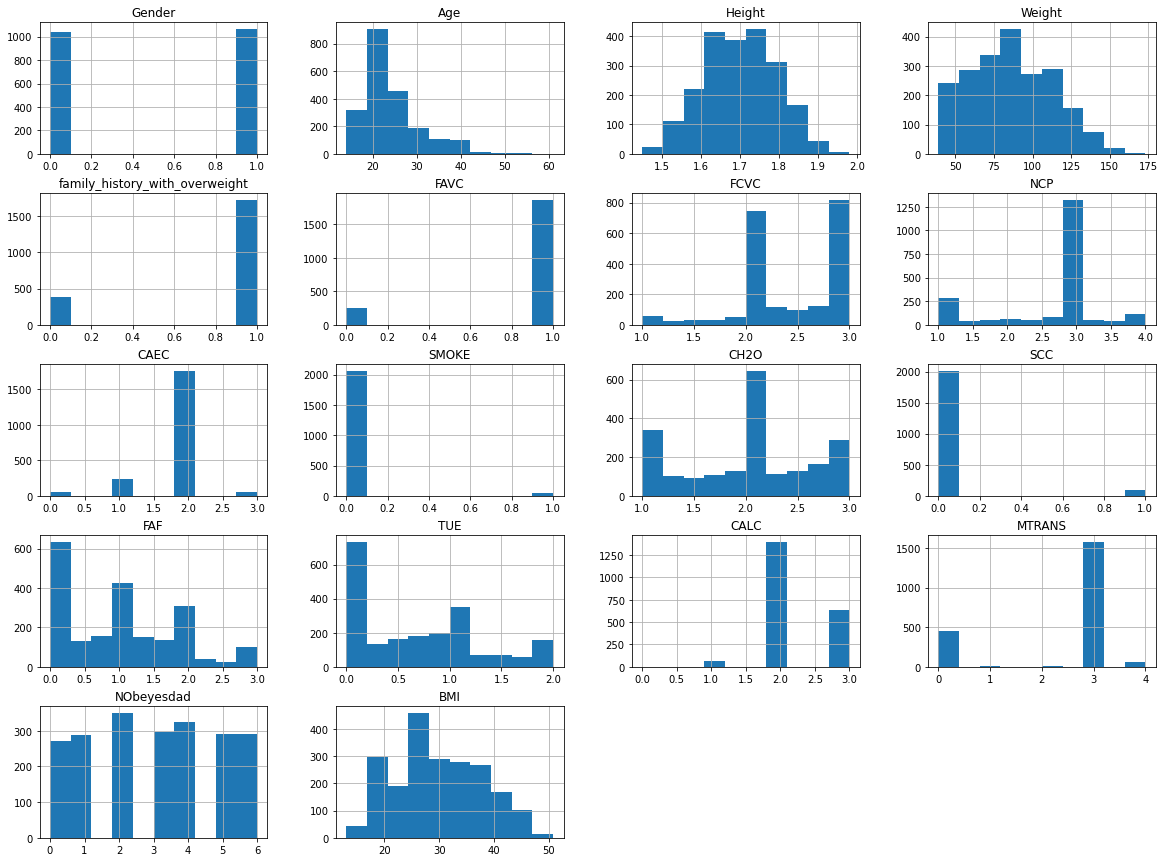

In [15]:
#(part 4) For all columns, visualize distribution of the data using histogram. 
#Comment on the data’s modality (i.e., bimodal, trimodal, etc.)
obesity_df.hist(figsize=(20,15)) 

In [16]:
obesity_df.dtypes


Gender                               int8
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight       int8
FAVC                                 int8
FCVC                              float64
NCP                               float64
CAEC                                 int8
SMOKE                                int8
CH2O                              float64
SCC                                  int8
FAF                               float64
TUE                               float64
CALC                                 int8
MTRANS                               int8
NObeyesdad                           int8
BMI                               float64
dtype: object

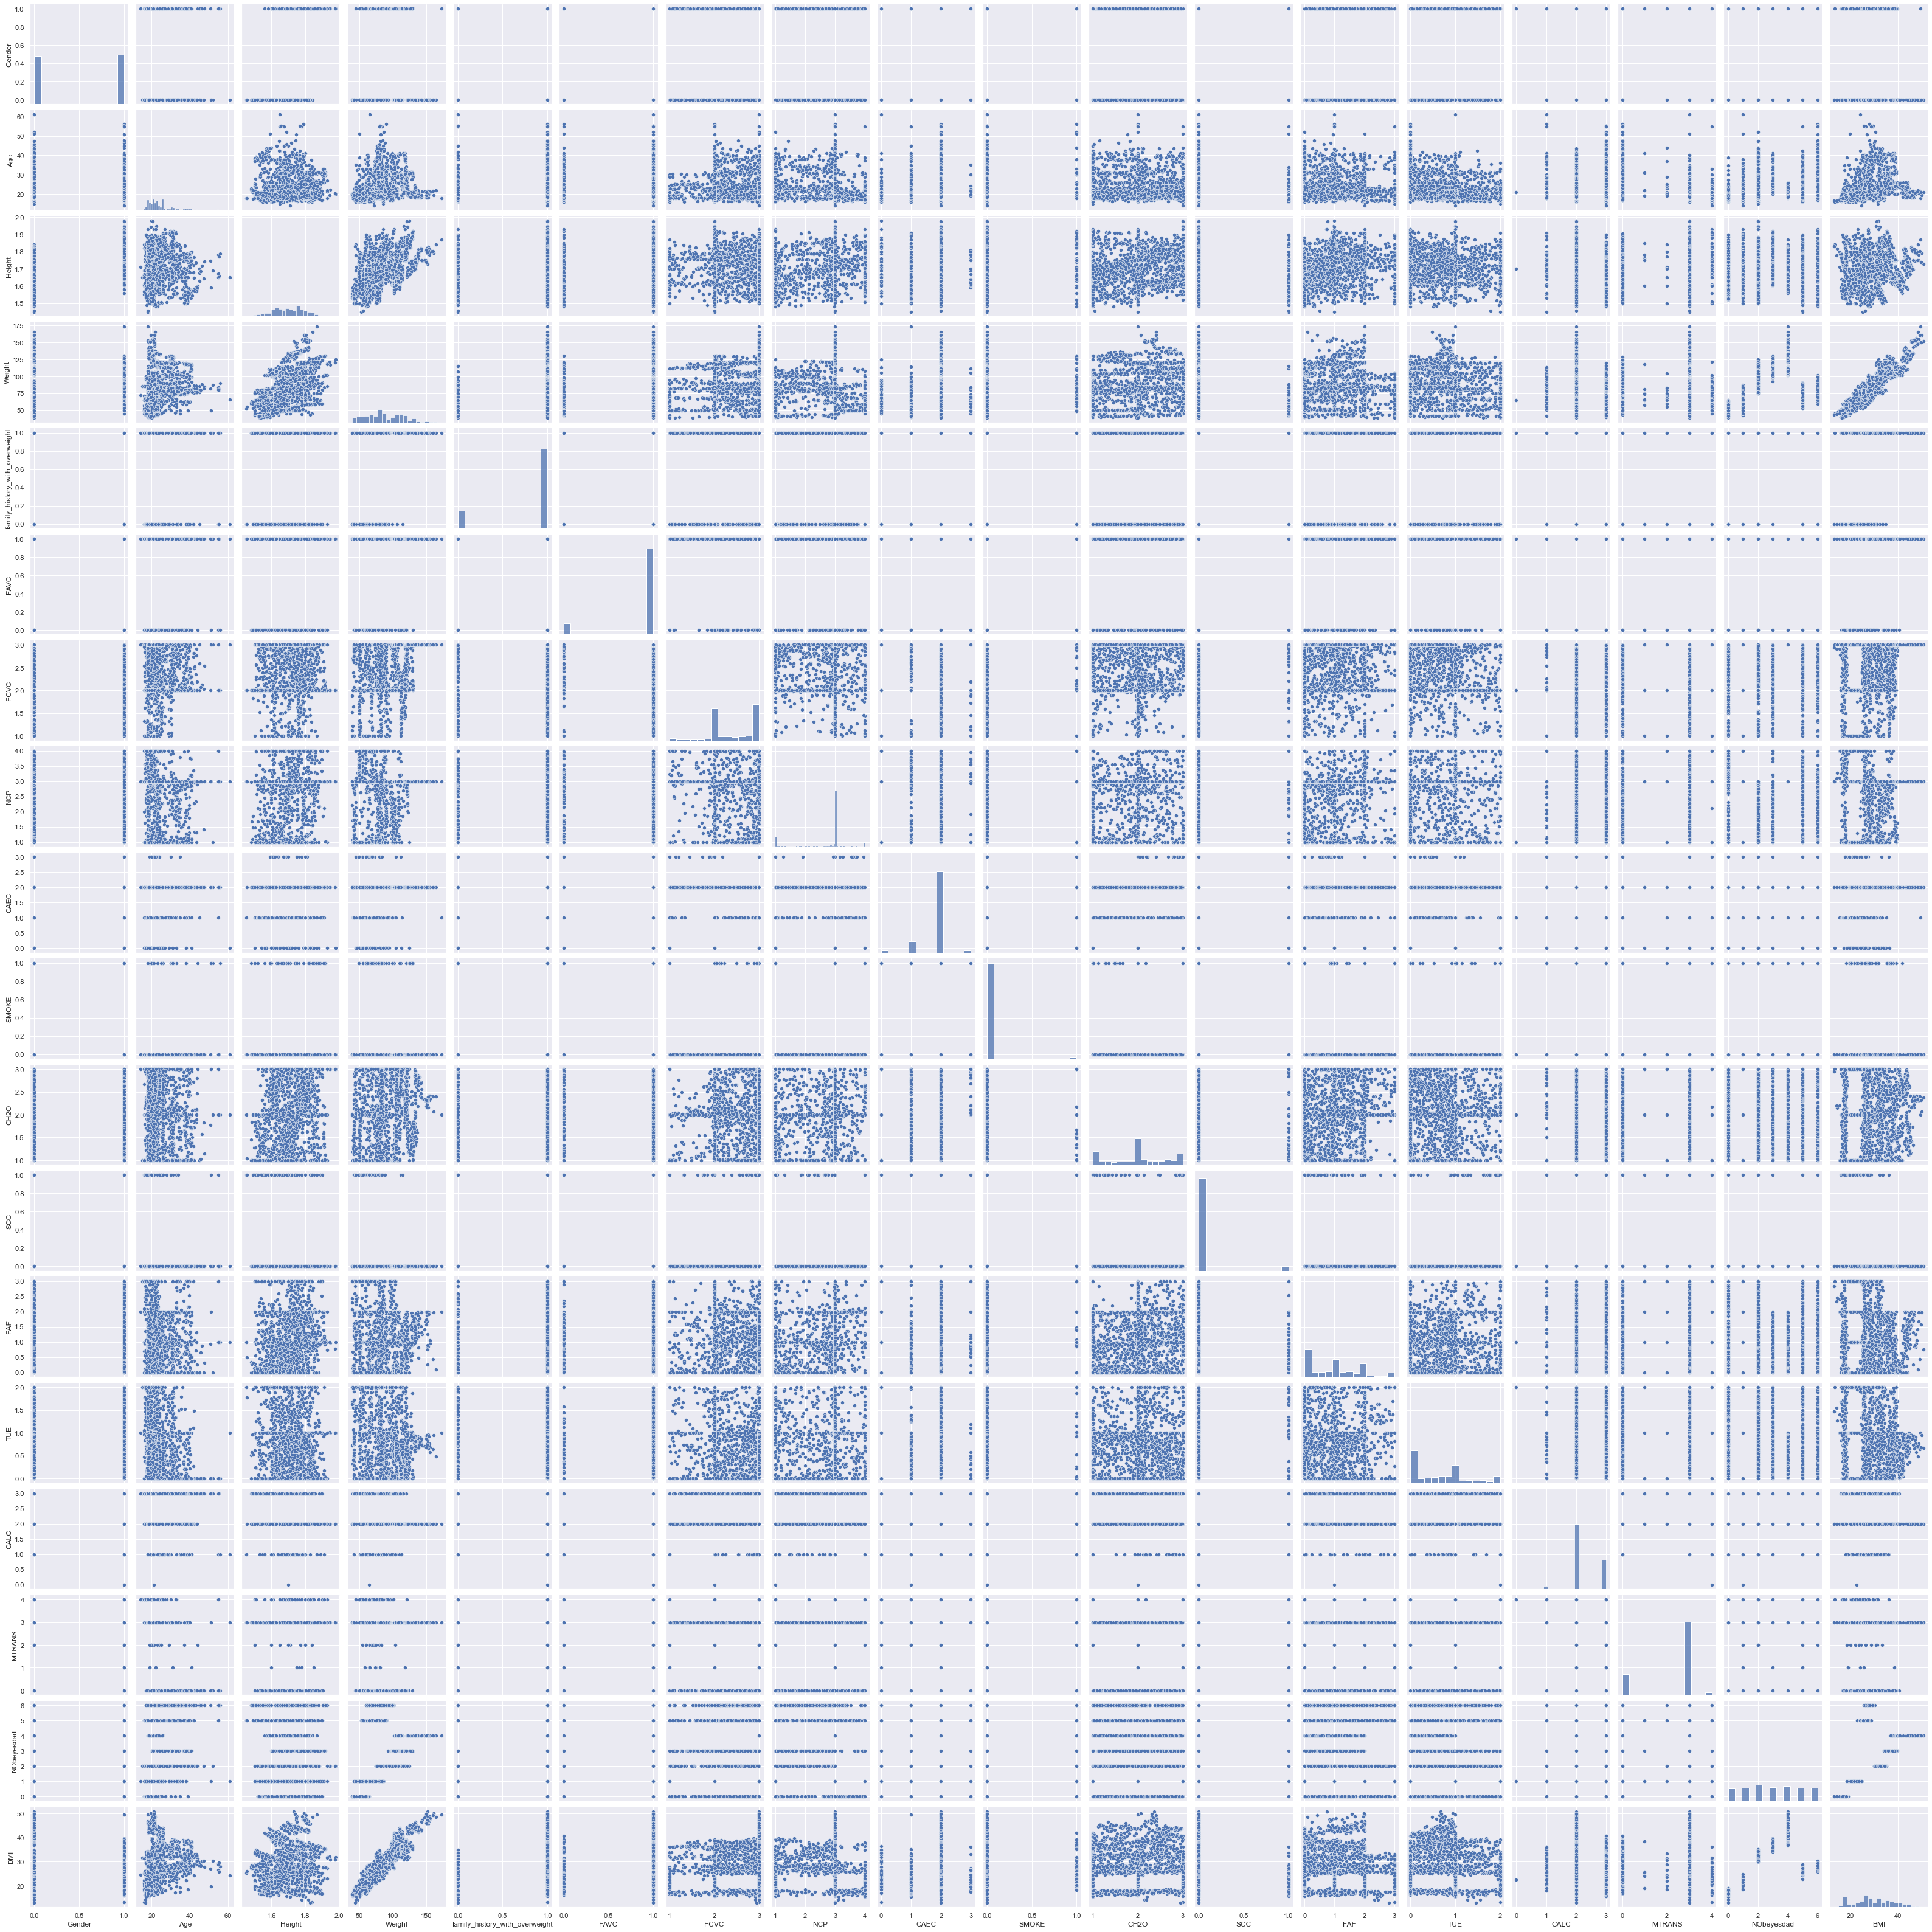

In [17]:
import seaborn as sns

sns.set()
sns.pairplot(obesity_df)

In [18]:
obesity_df.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,0.007616,-0.137537,0.024908,-0.053035
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,-0.044487,-0.601945,0.236170,0.244163
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,-0.129732,-0.073609,0.038986,0.131785
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,-0.206677,0.004610,0.387643,0.934806
family_history_with_overweight,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,0.036676,-0.101540,0.313667,0.483508
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,-0.089520,-0.069800,0.044582,0.246097
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,-0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,-0.060781,0.064743,0.018522,0.263651
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,-0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,-0.071747,-0.053858,-0.092616,0.039969
CAEC,0.091543,0.083739,0.048818,0.287493,0.169787,0.150068,-0.054670,-0.097801,1.000000,-0.055282,0.144995,-0.109179,-0.030110,-0.048567,-0.047540,-0.048535,0.327295,0.313278
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.082471,-0.010702,-0.023256,-0.000819


## Data Preprocessing

- Data Cleaning: clean the data by filling missing values, smoothing the noisy data, resolving the inconsistency, and removing outliers
- Data Integration: 
- Data Transformation
- Data Reduction

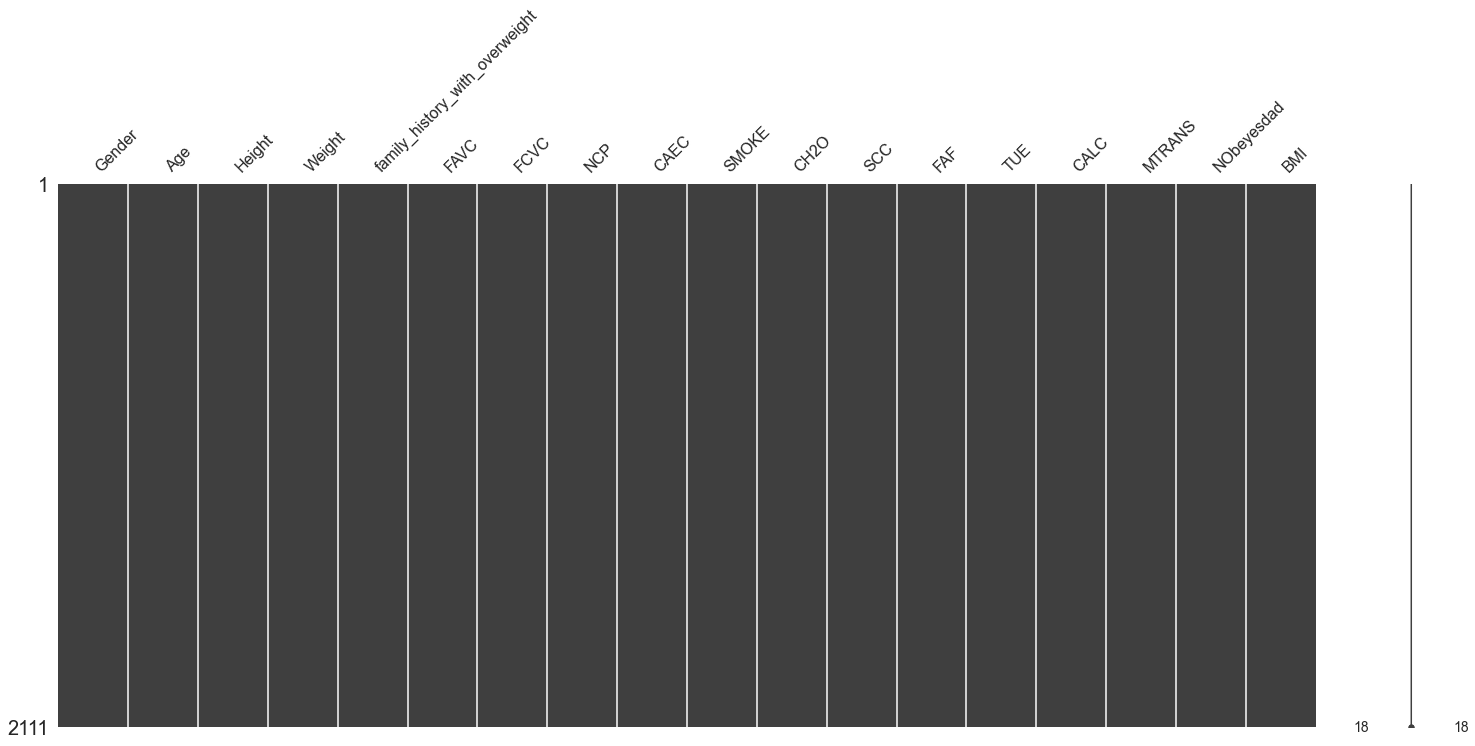

In [19]:
# Data Cleaning
# 1. Deal with Missing values
# 1.1 Ignore those tuples
# 1.2 Fill in the missing values 
obesity_df.isna().sum()
import missingno as msno
msno.matrix(obesity_df)
# 2. Deal with noisy data
# 2.1 Binning using cut and qcut
cat_columns = obesity_df.select_dtypes(['category']).columns



In [20]:
# Rounding age column values 
obesity_df['Age'] = obesity_df['Age'].apply(lambda age : round(age)) 

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# split the data into train and test parts
train_df, test_df = train_test_split(obesity_df,shuffle = True, test_size = 0.25, random_state=17)
# show descriptive charachteristics of the dataset such as min, max median

0.8699249294343492


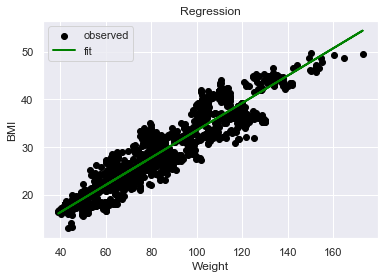

In [22]:
# Scikit-Learn ≥0.20 is required
import sklearn
from sklearn import linear_model
# Select a linear model
import numpy as np
from sklearn.linear_model import LinearRegression

X= train_df['Weight']
y = train_df['BMI']
X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical
    
# Train the model (we use all data for training --> 
model = sklearn.linear_model.LinearRegression()
model.fit(X2, y)
r_sq = model.score(X2, y)
print(r_sq)
plt.scatter(X2, y, color='black', label='observed')

plt.plot(X2, model.predict(X2), label='fit', color='Green', linewidth=2)

plt.xlabel('Weight')
plt.ylabel('BMI')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

0.23967599944910467


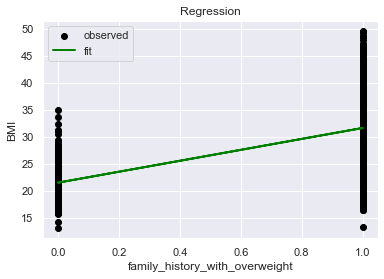

In [23]:
# Scikit-Learn ≥0.20 is required
import sklearn
from sklearn import linear_model
# Select a linear model
import numpy as np
from sklearn.linear_model import LinearRegression

X= train_df['family_history_with_overweight']
y = train_df['BMI']
X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical
    
# Train the model (we use all data for training --> 
model = sklearn.linear_model.LinearRegression()
model.fit(X2, y)
r_sq = model.score(X2, y)
print(r_sq)
plt.scatter(X2, y, color='black', label='observed')

plt.plot(X2, model.predict(X2), label='fit', color='Green', linewidth=2)

plt.xlabel('family_history_with_overweight')
plt.ylabel('BMI')
plt.title('Regression')
plt.legend(loc='best')

plt.show()